## Calculating energy

pyscal can also be used for quick energy calculations. The energy per atom can give an insight into the local environment. pyscal relies on the [python library interface](https://lammps.sandia.gov/doc/Python_library.html) of [LAMMPS](https://lammps.sandia.gov/) for calculation of energy. The python library interface, hence, is a requirement for energy calculation. The easiest way to set up the LAMMPS library is by installing LAMMPS through the conda package.
```
conda install -c conda-forge lammps
```
Alternatively, [this page](https://lammps.sandia.gov/doc/Python_head.html) provides information on how to compile manually.

### Interatomic potentials

An interatomic potential is also required for the calculation of energy. The potential can be of [any type that LAMMPS supports](https://lammps.sandia.gov/doc/pair_style.html). For this example, we will use an EAM potential for Mo which is provided in the file `Mo.set`.   

We start by importing the necessary modules,  

In [1]:
import pyscal.core as pc
import matplotlib.pyplot as plt
import numpy as np

For this example, a [LAMMPS dump file](https://lammps.sandia.gov/doc/dump.html) will be read in and the energy will be calculated.

In [2]:
sys = pc.System()
sys.read_inputfile("conf.bcc.dump")

Now the energy can be calculated by,

In [3]:
sys.calculate_energy(species=['Mo'], pair_style='eam/alloy', 
                     pair_coeff='* * Mo.set Mo', mass=95)

The first keyword above is `species`, which specifies the atomic species. This is required for [ASE](https://wiki.fysik.dtu.dk/ase/) module which is used under the hood for convertion of files. `pair_style` species the type of potential used in LAMMPS. See documentation [here](https://lammps.sandia.gov/doc/pair_style.html). `pair_coeff` is another LAMMPS command which is documented well [here](https://lammps.sandia.gov/doc/pair_coeff.html). Also, the mass needs to be provided.

Once the calculation is over, the energy can be accessed for each atom as follows,

In [4]:
atoms = sys.atoms

In [5]:
atoms[0].energy

-6.743130736133679

It is also possible to find the energy averaged over the neighbors using the `averaged` keyword. However, a neighbor calculation should be done before.

In [6]:
sys.find_neighbors(method="cutoff", cutoff=0)
sys.calculate_energy(species=['Mo'], pair_style='eam/alloy', 
                     pair_coeff='* * Mo.set Mo', mass=95, averaged=True)

In [7]:
atoms = sys.atoms
atoms[0].avg_energy

-6.534395941639571

We have two test configurations for Al at 900 K, one is fcc structured and the other one is in liquid state. We calculate the energy parameters for each of these configurations.

In [8]:
sys = pc.System()
sys.read_inputfile("../tests/conf.fcc.Al.dump")
sys.find_neighbors(method="cutoff", cutoff=0)

In [9]:
sys.calculate_energy(species=['Al'], pair_style='eam/alloy', 
                     pair_coeff='* * Al.eam.fs Al', mass=26.98, averaged=True)

Now lets gather the energies

In [10]:
atoms = sys.atoms
solid_energy = [atom.energy for atom in atoms]
solid_avg_energy = [atom.avg_energy for atom in atoms]

We can repeat the calculations for the liquid phase,

In [11]:
sys = pc.System()
sys.read_inputfile("../tests/conf.lqd.Al.dump")
sys.find_neighbors(method="cutoff", cutoff=0)
sys.calculate_energy(species=['Al'], pair_style='eam/alloy', 
                     pair_coeff='* * Al.eam.fs Al', mass=26.98, averaged=True)
atoms = sys.atoms
liquid_energy = [atom.energy for atom in atoms]
liquid_avg_energy = [atom.avg_energy for atom in atoms]

Finally we can plot the results

Text(0.5, 0, 'Energy')

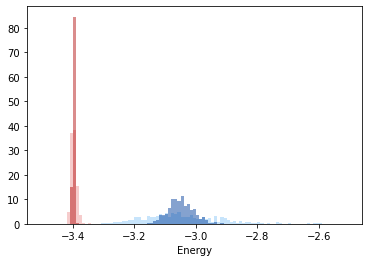

In [13]:
xmin = -3.5
xmax = -2.5
bins = np.arange(xmin, xmax, 0.01)
x = plt.hist(solid_energy, bins=bins, density=True, alpha=0.5, color="#EF9A9A")
x = plt.hist(solid_avg_energy, bins=bins, density=True, alpha=0.5, color="#B71C1C")
x = plt.hist(liquid_energy, bins=bins, density=True, alpha=0.5, color="#90CAF9")
x = plt.hist(liquid_avg_energy, bins=bins, density=True, alpha=0.5, color="#0D47A1")
plt.xlabel(r"Energy")